#✨Trabajo Practico n1 - Procesamiento del habla

##Alumna : Tais Roldan

##ISSD
___

📚Consigna: Realizar la entrega de cualquiera de las tareas MARTIN_FIERRO#1 #2 #3

Además de generar la lista de diccionarios con cada estrofa y su cantidad de versos, deberán añadir al final del notebook un análisis que responda a las siguientes preguntas:

1) ¿Cuál es la cantidad promedio de versos por estrofa en todo el poema?

2) ¿Cuáles son las 5 estrofas más largas (con más versos)? Imprimir el texto y su cantidad de versos.

3) (Bonus) Generar un gráfico de barras (usando matplotlib o seaborn) que muestre la frecuencia de las estrofas según su cantidad de versos (ej: cuántas estrofas de 4 versos hay, cuántas de 6, etc.)".
___
###Yo realizare la entrega de la tarea MARTIN_FIERRO#1, que consiste en cargar el PDF del libro Martín Fierro y generar una lista donde donde cada elemento tenga el siguiente formato: {num_pag: N, texto=}
___

###1️⃣1ra parte: Descargar el archivo:⬇️

In [65]:
!pip install pypdf #instalo la libreria
!pip install pdfplumber #instalo otra libreria que me servira para la parte de analisis

In [66]:
import requests #requests la voy a usar para poder descargar el PDF desde mi URL
from pypdf import PdfReader #con pdfreader puedo manipular los datos

In [67]:
def descargar_pdf(url, nombre_archivo): #defino la funcion que va a descargar mi PDF y le va poner el nombre que yo defiina mas adelante
    response = requests.get(url)
    with open(nombre_archivo, 'wb') as archivo: #con esto guardo el contenido de mi pdf en un archivo
        archivo.write(response.content)
    print(f"PDF descargado como {nombre_archivo}")

In [68]:
#creo mis variables, una con mi url y otra que va a servir para ponerle nombre a mi PDF
pdf_url = "https://www.argentina.gob.ar/sites/default/files/hernandez_jose_-_el_gaucho_martin_fierro.pdf"
nombre_pdf = "martin_fierro.pdf"

descargar_pdf(pdf_url, nombre_pdf) #ejecuto mi función y descargo mi pdf

PDF descargado como martin_fierro.pdf


###2️⃣2da parte: Cargar mi pdf y crear el diccionario📝

In [69]:
lector = PdfReader(nombre_pdf) #hago que pdfreader lea mi pdf

lista_paginas = [] #creo una lista vacia

for num_pag, pagina in enumerate(lector.pages, start=1): #recorro todas las páginas del PDF
    texto = pagina.extract_text()   #extraigo el texto de la página

    elemento = { #creo mi diccionario en el formato pedido
        "num_pag": num_pag,
        "texto": texto
    }

    lista_paginas.append(elemento) #agrego mi diccionario a la lista

print(lista_paginas[3]) #muestro un ejemplo (coloco 3 para que me muestre la 4ta pagina)

{'num_pag': 4, 'texto': 'El Gaucho Martín Fierro\nI\nAquí me pongo a cantar\nal compás de la vigüela,\nque el hombre que lo desvela\nuna pena estrordinaria,\ncomo la ave solitaria\ncon el cantar se consuela.\nPido a los santos del cielo\nque ayuden mi pensamiento:\nles pido en este momento\nque voy a cantar mi historia\nme refresquen la memoria\ny aclaren mi entendimiento.\nVengan santos milagrosos,\nvengan todos en mi ayuda,\nque la lengua se me añuda\ny se me turba la vista;\npido a mi Dios que me asista\nen una ocasión tan ruda.\nYo he visto muchos cantores,\ncon famas bien otenidas\ny que después de alquiridas\nno las quieren sustentar:\nparece que sin largar\nse cansaron en partidas.\nMas ande otro criollo pasa\nMartín Fierro ha de pasar;\nnada lo hace recular,\nni las fantasmas lo espantan,\ny dende que todos cantan\nyo también quiero cantar.\nCantando me he de morir,\ncantando me han de enterrar,\ny cantando he de llegar\nal pie del Eterno Padre;\ndende el vientre de mi madre\nv

#Parte del Analisis🔎
___

### Para empezar, todas las preguntas son relacionadas a las estrofas y versos, asi que primero voy a dividir el texto en estrofas y luego en versos para luego poder responder las preguntas
En esta parte tuve muchos problemas, ya que en un principio intenté normalizar el texto, reemplazando saltos multiples por un solo salto de renglon asi poder detectar las estrofas mas facilmente, pero luego me di cuenta que el formato de texto extraido no respetaba los saltos de pagina, asi que me tomaba todo el PDF como ua sola estrofa.
Analicé un poco el Martin Fierro por mi cuenta para encontrar algun factor común al fianlizar las estrofas, ya que no podia simplemente separar por versos y que cada 6  versos me haga una estrofa ya que no todas las estrofas tienen 6 versos, asi que elejí guiarme por un punto, ya que las gran mayoria de  estrofas terminan en punto. Una vez que decidí esto, me ayude con IAs para poder crear mi codigo.

In [70]:
import pdfplumber #esta libreria me facilitará esta tarea, ya que con pypdf no podia
import re #con esta libreria podre trabajar sobre los numeros romanos y distintas expresiones

nombre_pdf = "martin_fierro.pdf"
romanos = re.compile(r'^[IVXLCDM]+$') #el patron para los numeros romanos
pie_pagina = re.compile(r'^\s*P(á|a)gina\s+\d+\s*$', re.IGNORECASE) #Patrón para “Página N” (con o sin tilde, ignora mayúsc/minúsc)
with pdfplumber.open(nombre_pdf) as pdf:
    print(f"El PDF tiene {len(pdf.pages)} páginas.") #imprimo la cantidad de páginas

El PDF tiene 52 páginas.


In [71]:
def limpiar_minimo(texto): #recibe una linea de texto y devuelve una version limpia
    return (texto or "").replace("\xa0", " ").strip()

In [72]:
def estrofas_en_pagina(archivo_pdf, nro_pagina):
    lista = []
    acumulador = []
    versos = 0

    with pdfplumber.open(archivo_pdf) as pdf:
        pagina = pdf.pages[nro_pagina - 1]
        texto = pagina.extract_text() or ""
        lineas = [limpiar_minimo(linea) for linea in texto.splitlines()] #divido el texto en lineas

    for linea in lineas:
        if not linea or pie_pagina.fullmatch(linea):
            continue

        if romanos.fullmatch(linea): #si la linea es de numeros romanos, se interpreta como cabecera
            if versos > 0:
                lista.append({"nro_pag": nro_pagina,
                              "cant_versos": versos,
                              "texto": "\n".join(acumulador)})
                acumulador, versos = [], 0
            acumulador.append(linea)  # Cabecera romana
            continue

        acumulador.append(linea) #acumula y cuenta la cantidad de versos
        versos += 1

        # aca es donde logro que si el verso termina en punto(.), me cierra la estrofa
        if linea.strip().endswith("."):
            lista.append({"nro_pag": nro_pagina,
                          "cant_versos": versos,
                          "texto": "\n".join(acumulador)})
            acumulador, versos = [], 0 #me reinicia el acumulador y el contador

    return lista

##1. ¿Cuál es la cantidad promedio de versos por estrofa en todo el poema?

In [73]:
import statistics #importo el modulo estadistics para poder clacular el promedio

def obtener_todas_estrofas(archivo_pdf): #esta funcion tiene una lista vacia en la que se acumularan todas las estrofas del pdf
    todas_estrofas = []
    with pdfplumber.open(archivo_pdf) as pdf:
        for nro_pagina in range(1, len(pdf.pages) + 1):
            estrofas = estrofas_en_pagina(archivo_pdf, nro_pagina)
            todas_estrofas.extend(estrofas)
    return todas_estrofas
#con esta funcion calculo el promedio de versos por estrofa
def promedio_versos_por_estrofa(archivo_pdf):
    estrofas = obtener_todas_estrofas(archivo_pdf)
    if not estrofas:
        return 0 #si el pdf esta vacio devuelve 0 para evitar errores
    versos_por_estrofa = [estrofa["cant_versos"] for estrofa in estrofas] #crea una lista con solo los numeros de versos por estrofa
    return statistics.mean(versos_por_estrofa) #calcula y devuelve el promedio

archivo = "martin_fierro.pdf"
promedio = promedio_versos_por_estrofa(archivo)
print(f"La cantidad promedio de versos por estrofa es: {promedio:.2f}")

La cantidad promedio de versos por estrofa es: 5.20


##2. ¿Cuáles son las 5 estrofas más largas (con más versos)? Imprimir el texto y su cantidad de versos.

In [74]:
def estrofas_mas_largas(archivo_pdf, n=5):
    estrofas = obtener_todas_estrofas(archivo_pdf) #extrae todas las estrofas del pdf
    estrofas_ordenadas = sorted(estrofas, key=lambda x: x["cant_versos"], reverse=True) #aca ordena las estrofas de manera descendiente
    top_estrofas = estrofas_ordenadas[:min(n, len(estrofas))] #toma las primeras n estrofas

    for i, estrofa in enumerate(top_estrofas, 1):
        print(f"\nEstrofa {i} (Página {estrofa['nro_pag']}, {estrofa['cant_versos']} versos):")
        print(estrofa["texto"])
        print("-" * 40)

archivo = "martin_fierro.pdf"
estrofas_mas_largas(archivo, 5)


Estrofa 1 (Página 45, 24 versos):
A bailar un pericón
con una moza salí,
y cuando me vido allí
sin duda me conoció
y estas coplitas cantó
como por ráirse de mí:
"Las mujeres son todas
como las mulas;
yo no digo que todas,
pero hay algunas
que a las aves que vuelan
les sacan plumas."
"Hay gauchos que presumen
de tener damas;
no digo que presumen,
pero se alaban,
y a lo mejor los dejan
tocando tablas."
Se secretiaron las hembras
y yo ya me encocoré;
volié la anca y le grité:
"dejá de cantar... chicharra."
Y de un tajo a la guitarra
tuitas las cuerdas corté.
----------------------------------------

Estrofa 2 (Página 36, 18 versos):
"Vos matastes un moreno
y otro en una pulpería,
y aquí está la polecía
que viene a justar tus cuentas;
te va a alzar por las cuarenta
si te resistís hoy día."
-"No me vengan, contesté,
con relación de dijuntos:
esos son otros asuntos;
vean si me pueden llevar,
que yo no me he de entregar
aunque vengan todos juntos."
Pero no aguardaron más
y se apiaron en mont

##Generar un gráfico de barras (usando matplotlib o seaborn) que muestre la frecuencia de las estrofas según su cantidad de versos (ej: cuántas estrofas de 4 versos hay, cuántas de 6, etc.)".

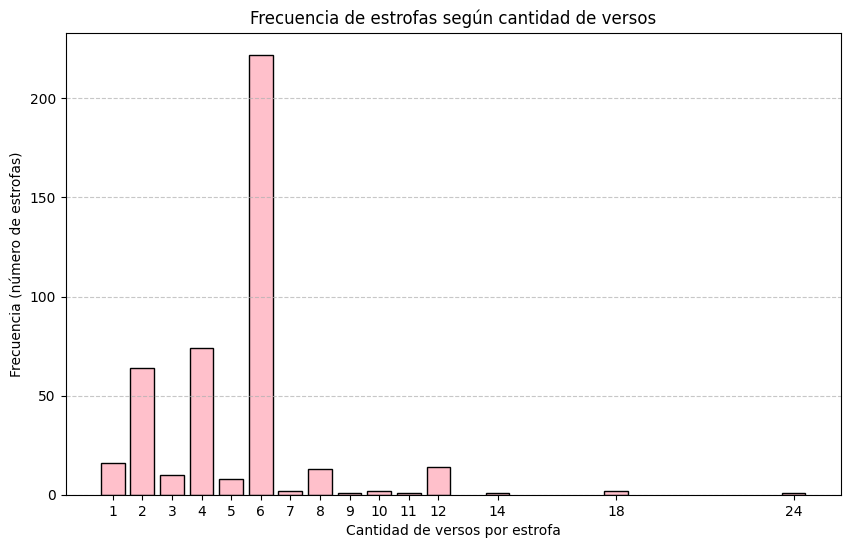

In [75]:
import matplotlib.pyplot as plt #biblioteca para realizar gráficos
from collections import Counter #counter cuenta automaticamente la cantidad de veces que aparece cada elemento en una lista

def grafico_frecuencia_versos(archivo_pdf):
    estrofas = obtener_todas_estrofas(archivo_pdf)
    versos_por_estrofa = [estrofa["cant_versos"] for estrofa in estrofas]

    frecuencias = Counter(versos_por_estrofa) #aca cuenta la frecuencia de cantidad de textos

    cantidades = sorted(frecuencias.keys()) #prepara los datos para el gráfico
    frecuencias_valores = [frecuencias[cant] for cant in cantidades]

    plt.figure(figsize=(10, 6)) #crea el gráfico de barras
    plt.bar(cantidades, frecuencias_valores, color='pink', edgecolor='black')
    plt.xlabel('Cantidad de versos por estrofa')
    plt.ylabel('Frecuencia (número de estrofas)')
    plt.title('Frecuencia de estrofas según cantidad de versos')
    plt.xticks(cantidades)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


archivo = "martin_fierro.pdf"
grafico_frecuencia_versos(archivo)